### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

512 px cropped by Optic Disc area and resized to 128 px images were used.

You can either train your model or upload a pre-trained one from:
*../models_weights/02.03,13:57,OD Cup, U-Net light on DRISHTI-GS 512 px cropped to OD 128 px fold 0, SGD, log_dice loss/last_checkpoint.hdf5*

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
from model import *

In [9]:
print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.2.4-tf
TensorFlow version: 1.14.0


In [10]:
K.set_image_data_format('channels_last')

In [11]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

In [15]:
model = get_unet_light(img_rows=128, img_cols=128)
model.compile(optimizer=SGD(learning_rate=1e-4, momentum=0.95),
              loss=log_dice_loss,
              metrics=[mean_IOU_gpu, dice_metric])

#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [16]:
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

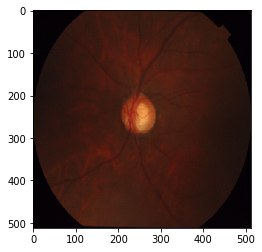

(50, 512, 512, 3)


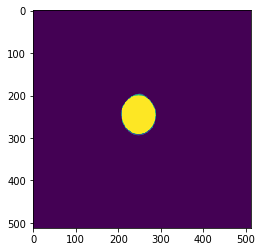

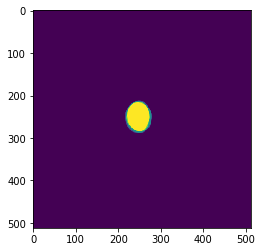

In [17]:
plt.imshow(img_train[0])
plt.show()
print(img_train.shape)
plt.imshow(np.squeeze(disc_train[0]))
plt.show()
plt.imshow(np.squeeze(cup_train[0]))
plt.show()

In [18]:
img_train, cup_train, disc_train, disc_locations

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

#### Generator of augmented data:

Testing the data generator and generator for augmented data:

In [19]:
gen = data_generator(img_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


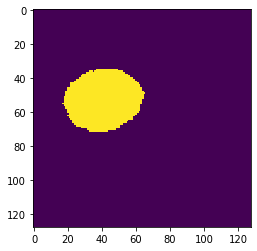

In [20]:
plt.imshow(np.squeeze(batch[1][0]))

In [21]:
arch_name = "OD Cup, U-Net light on DRISHTI-GS 512 px cropped to OD 128 px fold 0, SGD, log_dice loss"
weights_folder = os.path.join(os.path.dirname(os.getcwd()), 'models_weights',
                              '{}'.format(arch_name))

In [22]:
def folder(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    return folder_name

In [23]:
img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

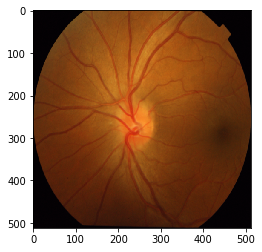

51


In [24]:
plt.imshow(img_test[50])
plt.show()
print(len(img_test))

In [25]:
X_valid, Y_valid = next(data_generator(img_test, cup_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))

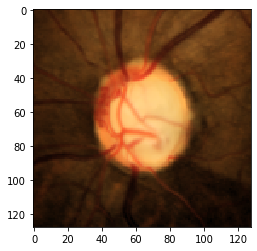

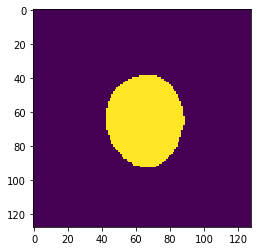

In [36]:
len(X_valid)

plt.imshow(X_valid[9])
plt.show()

plt.imshow(np.squeeze(Y_valid[9]))
plt.show()

### Training

If a pretrained model needs to be used, first run "Loading model" section below and then go the "Comprehensive visual check", skipping this section.

In [ ]:
history = model.fit_generator(data_generator(img_train, cup_train, disc_locations, train_or_test='train', batch_size=1), 
                              steps_per_epoch=99,
                              max_queue_size=1,                                                
                              epochs=500, verbose=1,                              
                              callbacks=[CSVLogger(os.path.join(folder(weights_folder), 'training_log_cup_color.csv')),
                                         ModelCheckpoint(os.path.join(folder(weights_folder),
                                               'last_checkpoint_cup_color.hdf5'),
                                               monitor='val_loss', mode='min', save_best_only=True, 
                                               save_weights_only=False, verbose=0)])

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Epoch 1/500
42/99 [===========>..................] - ETA: 28s - loss: 1.5615 - mean_IOU_gpu: 0.1345 - dice_metric: 0.2304

### Visual check

image #0


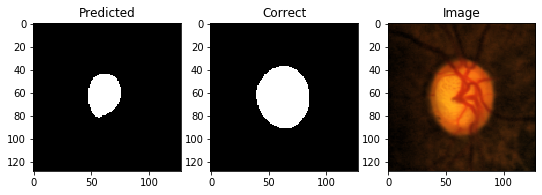

IOU: 0.4287184774875641
Dice: 0.6001440922190202
image #1


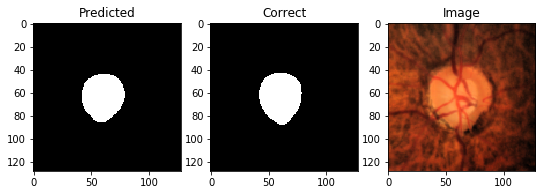

IOU: 0.9148772954940796
Dice: 0.9555466559871846
image #2


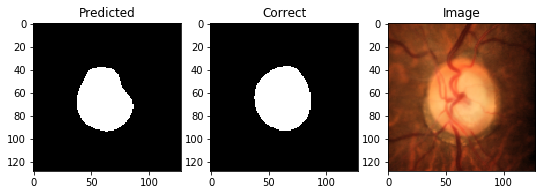

IOU: 0.8687050342559814
Dice: 0.9297401347449471
image #3


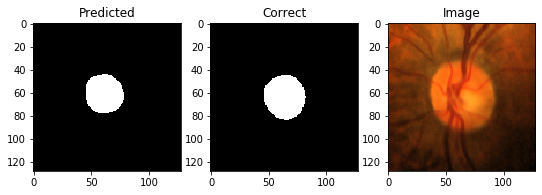

IOU: 0.7275891900062561
Dice: 0.8423173803526448
image #4


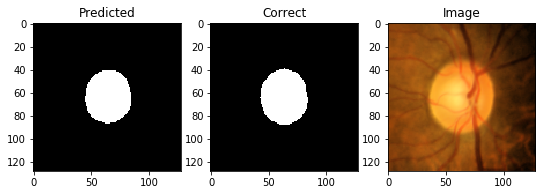

IOU: 0.9168254137039185
Dice: 0.9566081483935078
image #5


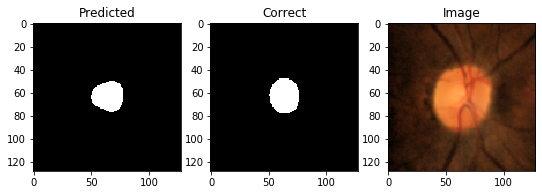

IOU: 0.8196969628334045
Dice: 0.9009159034138218
image #6


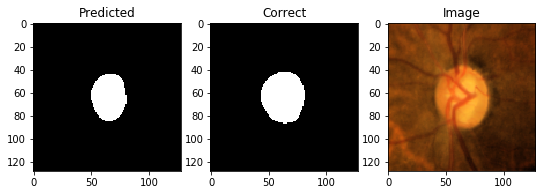

IOU: 0.7440298795700073
Dice: 0.8532306375695335
image #7


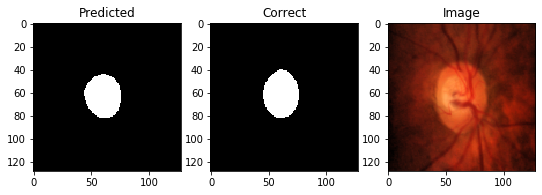

IOU: 0.8728323578834534
Dice: 0.9320987654320988
image #8


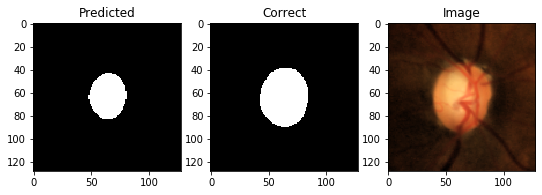

IOU: 0.5899999737739563
Dice: 0.7421383647798742
image #9


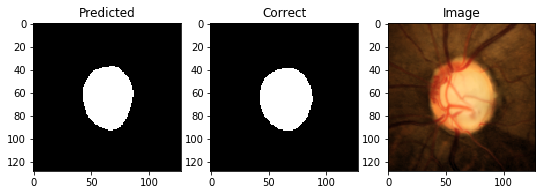

IOU: 0.9190954566001892
Dice: 0.9578423671118094
image #10


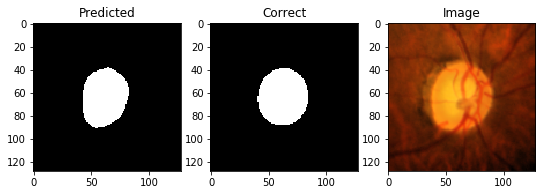

IOU: 0.875420868396759
Dice: 0.933572710951526
image #11


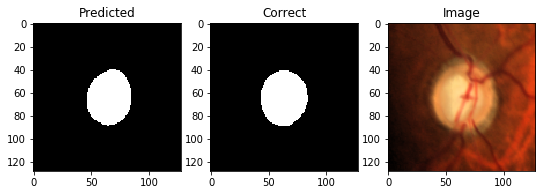

IOU: 0.8507094383239746
Dice: 0.9193333333333333
image #12


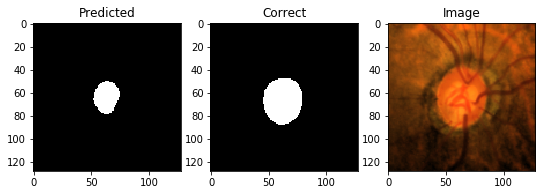

IOU: 0.44250229001045227
Dice: 0.6135204081632653
image #13


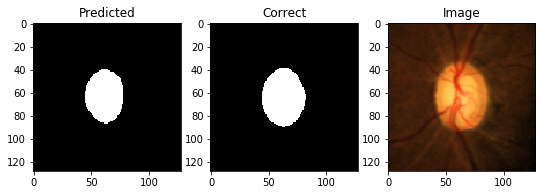

IOU: 0.821088433265686
Dice: 0.9017556966753829
image #14


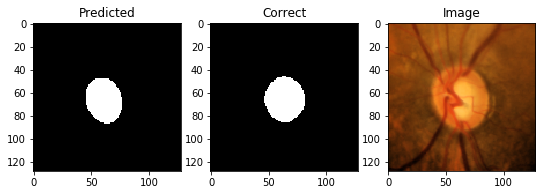

IOU: 0.7684301733970642
Dice: 0.8690534575772437
image #15


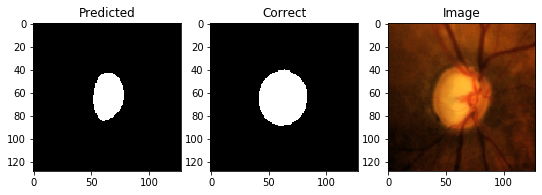

IOU: 0.5439146757125854
Dice: 0.7045916294189354
image #16


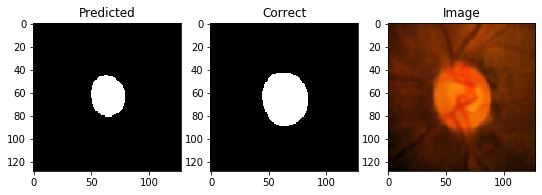

IOU: 0.5727891325950623
Dice: 0.7283737024221453
image #17


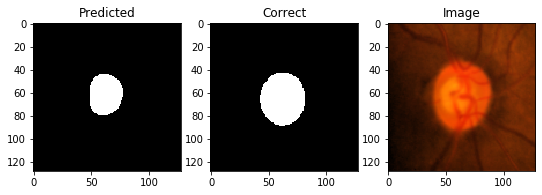

IOU: 0.6024096608161926
Dice: 0.7518796992481203
image #18


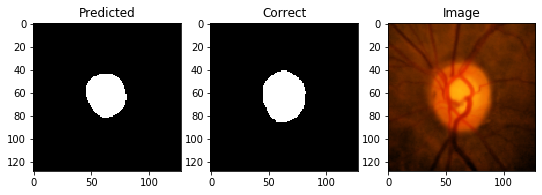

IOU: 0.8040279150009155
Dice: 0.8913696865607557
image #19


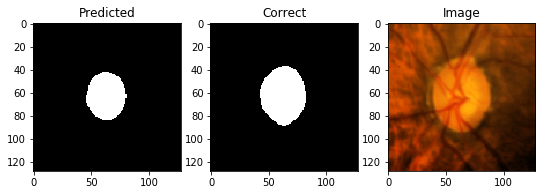

IOU: 0.7211847901344299
Dice: 0.8380097268986157
image #20


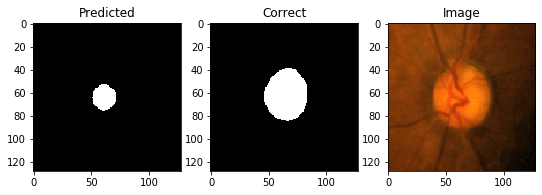

IOU: 0.2707224190235138
Dice: 0.4260921603830042
image #21


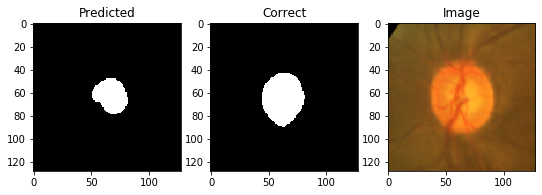

IOU: 0.5333850979804993
Dice: 0.6956962025316455
image #22


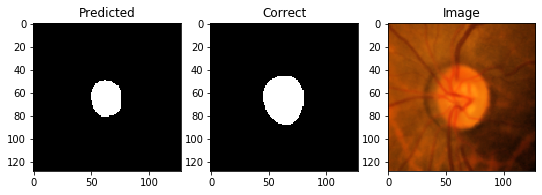

IOU: 0.5685279369354248
Dice: 0.7249190938511327
image #23


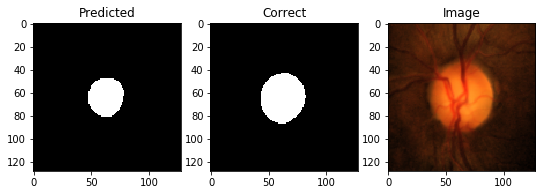

IOU: 0.6229134798049927
Dice: 0.7676484338475923
image #24


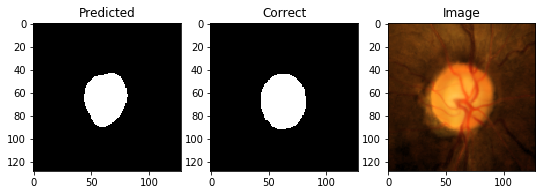

IOU: 0.8475130796432495
Dice: 0.9174636911087496
image #25


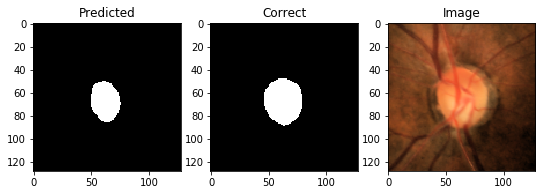

IOU: 0.6701421737670898
Dice: 0.8024971623155505
image #26


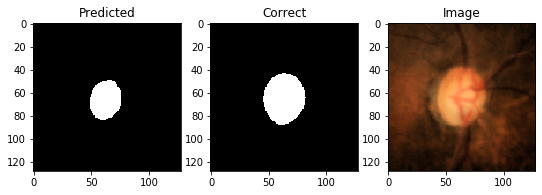

IOU: 0.5970991253852844
Dice: 0.7477295660948536
image #27


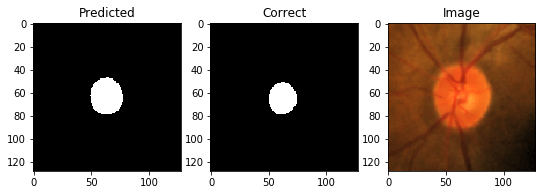

IOU: 0.7385257482528687
Dice: 0.8496
image #28


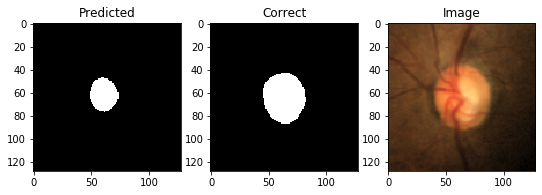

IOU: 0.43809524178504944
Dice: 0.609271523178808
image #29


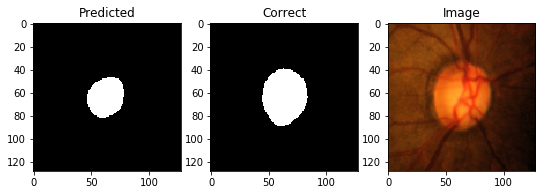

IOU: 0.5921674370765686
Dice: 0.7438507209499576
image #30


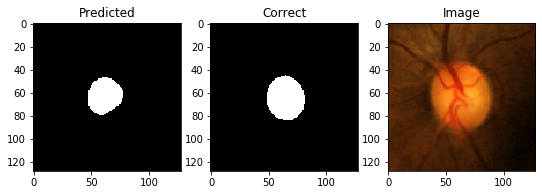

IOU: 0.690891444683075
Dice: 0.8171919770773639
image #31


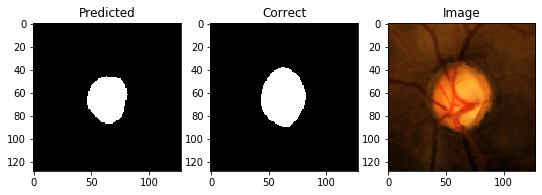

IOU: 0.7253989577293396
Dice: 0.8408477842003853
image #32


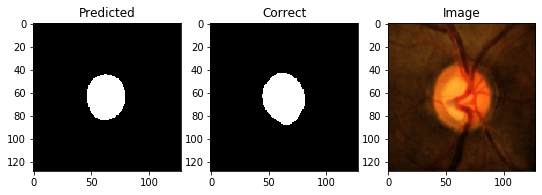

IOU: 0.842822790145874
Dice: 0.9147084421235857
image #33


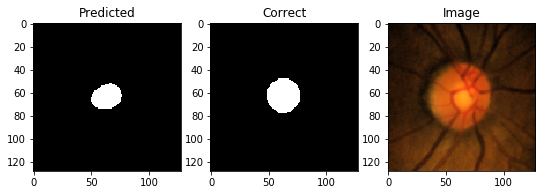

IOU: 0.6535087823867798
Dice: 0.7904509283819628
image #34


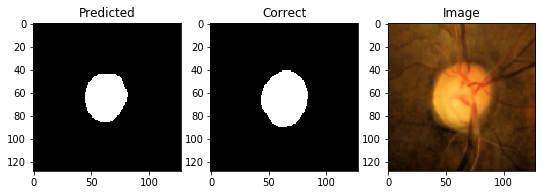

IOU: 0.7914473414421082
Dice: 0.8835842820418656
image #35


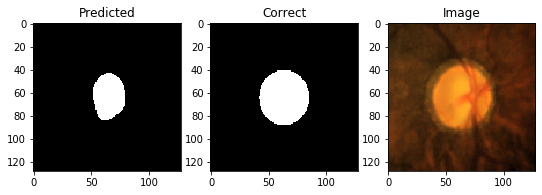

IOU: 0.5521472096443176
Dice: 0.7114624505928854
image #36


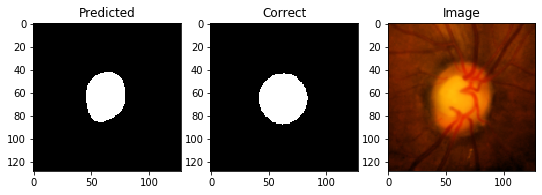

IOU: 0.7899729013442993
Dice: 0.882664647993944
image #37


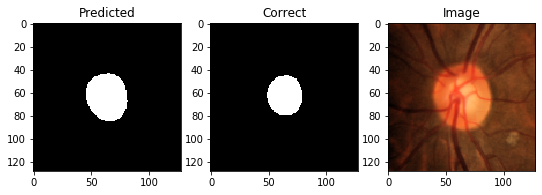

IOU: 0.7226462960243225
Dice: 0.8389955686853766
image #38


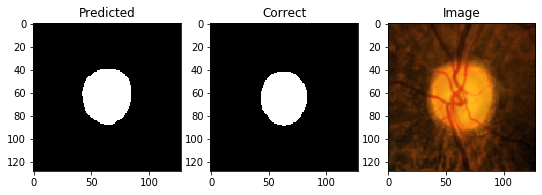

IOU: 0.8762019276618958
Dice: 0.9340166559897501
image #39


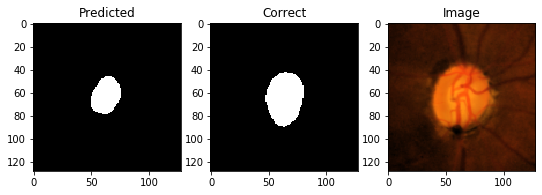

IOU: 0.5413851141929626
Dice: 0.7024657534246576
image #40


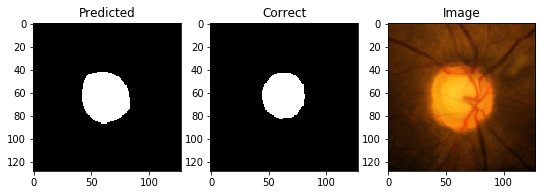

IOU: 0.7714856863021851
Dice: 0.871004136893569
image #41


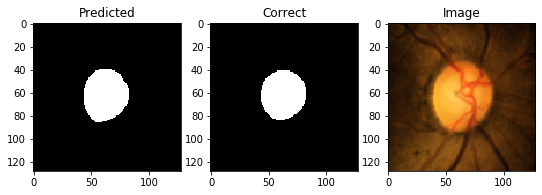

IOU: 0.9267605543136597
Dice: 0.9619883040935673
image #42


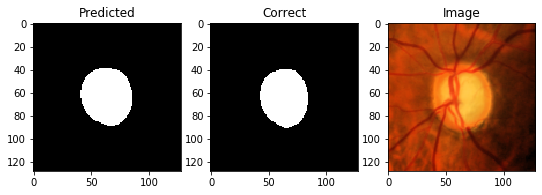

IOU: 0.9017117619514465
Dice: 0.9483159117305459
image #43


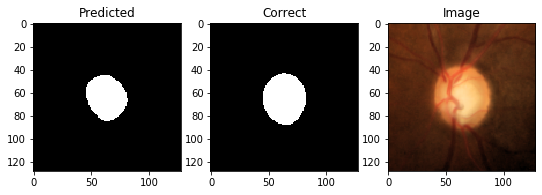

IOU: 0.8038167953491211
Dice: 0.8912399492170969
image #44


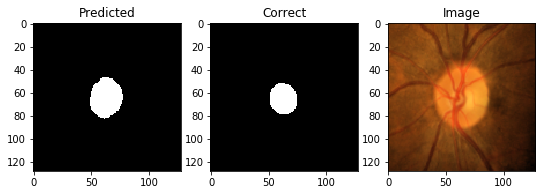

IOU: 0.6619170904159546
Dice: 0.7965705378020265
image #45


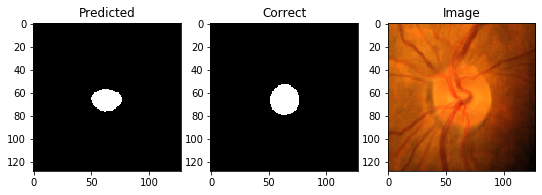

IOU: 0.6873857378959656
Dice: 0.8147345612134345
image #46


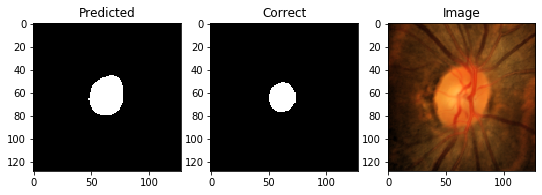

IOU: 0.5664251446723938
Dice: 0.723207401696222
image #47


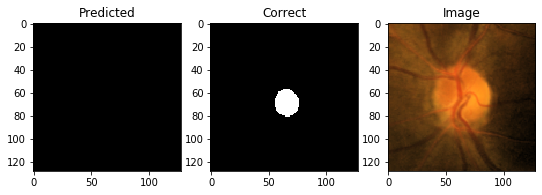

IOU: 0.0
Dice: 0.0
image #48


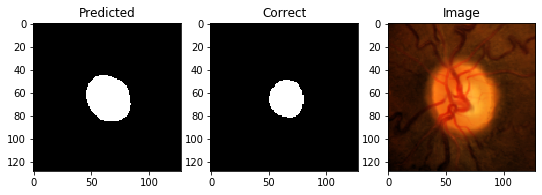

IOU: 0.634206235408783
Dice: 0.7761642463695543
image #49


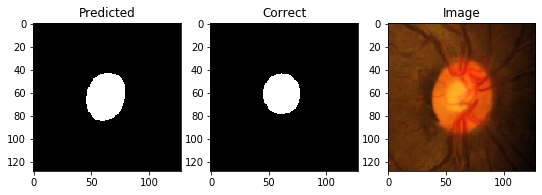

IOU: 0.7633187770843506
Dice: 0.8657751362060426


In [30]:
pred_iou, pred_dice = [], []
pred_cup = []

for i, img_no in enumerate(test_idx):
    print('image #{}'.format(img_no))
    img = img_test[img_no]
    batch_X = X_valid[i:i + 1]
    batch_y = Y_valid[i:i + 1]
    
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    pred_cup.append(pred)
    corr = th_to_tf_encoding(batch_y)[0, ..., 0]
        
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(pred, cmap=plt.cm.Greys_r)
    ax.set_title('Predicted')
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(corr, cmap=plt.cm.Greys_r)
    ax.set_title('Correct')
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(th_to_tf_encoding(batch_X)[0])
    ax.set_title('Image')
    plt.show()
    
    cur_iou = K.eval(mean_IOU_gpu(pred[None, None, ...], corr[None, None, ...]))
    cur_dice = K.eval(dice(pred[None, None, ...], corr[None, None, ...]))
    print('IOU: {}\nDice: {}'.format(cur_iou, cur_dice))
    pred_iou.append(cur_iou)
    pred_dice.append(cur_dice)

Acquiring scores for the validation set:

In [ ]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

### Loading model

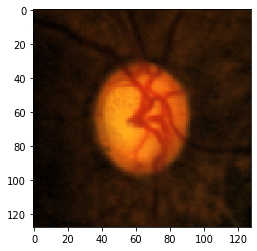

In [35]:
X_valid, Z_valid = next(data_generator(img_test, disc_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))

In [ ]:
history = model.fit_generator(data_generator(img_train, disc_train, disc_locations, train_or_test='train', batch_size=1), 
                              steps_per_epoch=99,
                              max_queue_size=1,                                            
                              epochs=500, verbose=1,                              
                              callbacks=[CSVLogger(os.path.join(folder(weights_folder), 'training_log_disc_color.csv')),
                                         ModelCheckpoint(os.path.join(folder(weights_folder),
                                               'last_checkpoint_disc_color.hdf5'),
                                               monitor='val_loss', mode='min', save_best_only=True, 
                                               save_weights_only=False, verbose=0)])

Epoch 1/500
99/99 [==============================] - 54s 543ms/step - loss: 0.1415 - mean_IOU_gpu: 0.7631 - dice_metric: 0.8547
Epoch 2/500
99/99 [==============================] - 54s 550ms/step - loss: 0.0856 - mean_IOU_gpu: 0.8255 - dice_metric: 0.8998
Epoch 3/500
99/99 [==============================] - 63s 638ms/step - loss: 0.0574 - mean_IOU_gpu: 0.8665 - dice_metric: 0.9271
Epoch 4/500
99/99 [==============================] - 64s 646ms/step - loss: 0.0579 - mean_IOU_gpu: 0.8655 - dice_metric: 0.9263
Epoch 5/500
99/99 [==============================] - 64s 650ms/step - loss: 0.0538 - mean_IOU_gpu: 0.8789 - dice_metric: 0.9334
Epoch 6/500
99/99 [==============================] - 65s 659ms/step - loss: 0.0474 - mean_IOU_gpu: 0.8858 - dice_metric: 0.9389
Epoch 7/500
99/99 [==============================] - 67s 673ms/step - loss: 0.0510 - mean_IOU_gpu: 0.8806 - dice_metric: 0.9352
Epoch 8/500
99/99 [==============================] - 66s 671ms/step - loss: 0.0484 - mean_IOU_gpu: 0.884

99/99 [==============================] - 147s 1s/step - loss: 0.0356 - mean_IOU_gpu: 0.9113 - dice_metric: 0.9533
Epoch 66/500
99/99 [==============================] - 146s 1s/step - loss: 0.0342 - mean_IOU_gpu: 0.9146 - dice_metric: 0.9551
Epoch 67/500
99/99 [==============================] - 147s 1s/step - loss: 0.0348 - mean_IOU_gpu: 0.9132 - dice_metric: 0.9544
Epoch 68/500
99/99 [==============================] - 146s 1s/step - loss: 0.0300 - mean_IOU_gpu: 0.9242 - dice_metric: 0.9604
Epoch 69/500
99/99 [==============================] - 146s 1s/step - loss: 0.0358 - mean_IOU_gpu: 0.9107 - dice_metric: 0.9529
Epoch 70/500
99/99 [==============================] - 146s 1s/step - loss: 0.0336 - mean_IOU_gpu: 0.9167 - dice_metric: 0.9563
Epoch 71/500
99/99 [==============================] - 146s 1s/step - loss: 0.0339 - mean_IOU_gpu: 0.9160 - dice_metric: 0.9558
Epoch 72/500
99/99 [==============================] - 146s 1s/step - loss: 0.0356 - mean_IOU_gpu: 0.9123 - dice_metric: 0.95

In [ ]:
pred_iou, pred_dice = [], []
pred_disc = []

for i, img_no in enumerate(test_idx):
    print('image #{}'.format(img_no))
    img = img_train[img_no]
    batch_X = X_valid[i:i + 1]
    batch_z = Z_valid[i:i + 1]
    
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    pred_disc.append(pred)
    corr = th_to_tf_encoding(batch_z)[0, ..., 0]
        
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(pred, cmap=plt.cm.Greys_r)
    ax.set_title('Predicted')
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(corr, cmap=plt.cm.Greys_r)
    ax.set_title('Correct')
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(th_to_tf_encoding(batch_X)[0])
    ax.set_title('Image')
    plt.show()
    
    cur_iou = K.eval(mean_IOU_gpu(pred[None, None, ...], corr[None, None, ...]))
    cur_dice = K.eval(dice(pred[None, None, ...], corr[None, None, ...]))
    print('IOU: {}\nDice: {}'.format(cur_iou, cur_dice))
    pred_iou.append(cur_iou)
    pred_dice.append(cur_dice)

In [ ]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

In [ ]:
def ellipseFitting(img):
    contours, hierarchy = cv2.findContours(img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    ellipse = np.zeros(img.shape)
    diametro = []
    for ind, cont in enumerate(contours):
        (x,y),(MA,ma),angle = cv2.fitEllipse(cont)
        diametro.append((MA, ma))
        cv2.ellipse(ellipse,(int(x),int(y)),(int(MA/2), int(ma/2)),angle,0,360,(255,255,255),0)
    return ellipse, diametro

In [ ]:
import cv2
cdrs = []
for i, img_no in enumerate(test_idx):
    cup = pred_cup[i]
    disc = pred_disc[i]
        
    c = cv2.Canny(cup.astype(np.uint8), 1,1)
    d = cv2.Canny(disc.astype(np.uint8), 1,1)
    
    el_c, diam_c = ellipseFitting(c)
    el_d, diam_d = ellipseFitting(d)
        
    if len(diam_d) > 0 and len(diam_c) > 0:
        cdr = diam_c[0][1]/diam_d[0][1]
        cdrs.append(cdr)
        print('image #{} - cdr = {}'.format(img_no, cdr))
